In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('ipl_cleaned.csv')


In [12]:
print(df.head())

   season       id                                          name short_name  \
0  2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   RCB v GT   
1  2023.0  1359543          Mumbai Indians v Sunrisers Hyderabad   MI v SRH   
2  2023.0  1359542  Kolkata Knight Riders v Lucknow Super Giants  KKR v LSG   
3  2023.0  1359541          Delhi Capitals v Chennai Super Kings   DC v CSK   
4  2023.0  1359540               Punjab Kings v Rajasthan Royals  PBKS v RR   

                                         description home_team away_team  \
0  70th Match (N), Indian Premier League at Benga...       RCB        GT   
1  69th Match (D/N), Indian Premier League at Mum...        MI       SRH   
2  68th Match (N), Indian Premier League at Kolka...       KKR       LSG   
3  67th Match (D/N), Indian Premier League at Del...        DC       CSK   
4  66th Match (N), Indian Premier League at Dhara...      PBKS        RR   

  toss_won    decision 1st_inning_score  ...  \
0       GT  BOWL FIR

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            899 non-null    float64
 1   id                899 non-null    int64  
 2   name              899 non-null    object 
 3   short_name        899 non-null    object 
 4   description       899 non-null    object 
 5   home_team         899 non-null    object 
 6   away_team         899 non-null    object 
 7   toss_won          899 non-null    object 
 8   decision          899 non-null    object 
 9   1st_inning_score  899 non-null    object 
 10  2nd_inning_score  899 non-null    object 
 11  winner            899 non-null    object 
 12  result            899 non-null    object 
 13  start_date        899 non-null    object 
 14  end_date          899 non-null    object 
 15  venue_id          899 non-null    int64  
 16  venue_name        899 non-null    object 
 1

In [14]:
print(df.describe())

            season            id      venue_id  home_overs   home_runs  \
count   899.000000  8.990000e+02  8.990000e+02  899.000000  899.000000   
mean   2015.729700  8.782062e+05  1.266364e+05   19.116240  158.746385   
std       4.596323  3.501428e+05  1.660742e+05    2.008041   31.665220   
min    2008.000000  3.359820e+05  5.785100e+04    4.500000   58.000000   
25%    2012.000000  5.483265e+05  5.799100e+04   19.200000  138.500000   
50%    2015.000000  8.298150e+05  5.815000e+04   20.000000  160.000000   
75%    2020.000000  1.216510e+06  5.909350e+04   20.000000  180.000000   
max    2023.000000  1.359544e+06  1.070094e+06   20.000000  263.000000   

       home_wickets  home_boundaries  away_overs   away_runs  away_wickets  \
count    899.000000       899.000000  899.000000  899.000000    899.000000   
mean       5.751947        19.484983   19.086318  155.814238      5.905451   
std        2.390051         5.903506    2.072742   31.238539      2.511657   
min        0.000000  

In [21]:
def extract_runs(score):
    if pd.isna(score):
        return np.nan
    return int(score.split('/')[0])

df['1st_inning_runs'] = df['1st_inning_score'].apply(extract_runs)
df['2nd_inning_runs'] = df['2nd_inning_score'].apply(extract_runs)

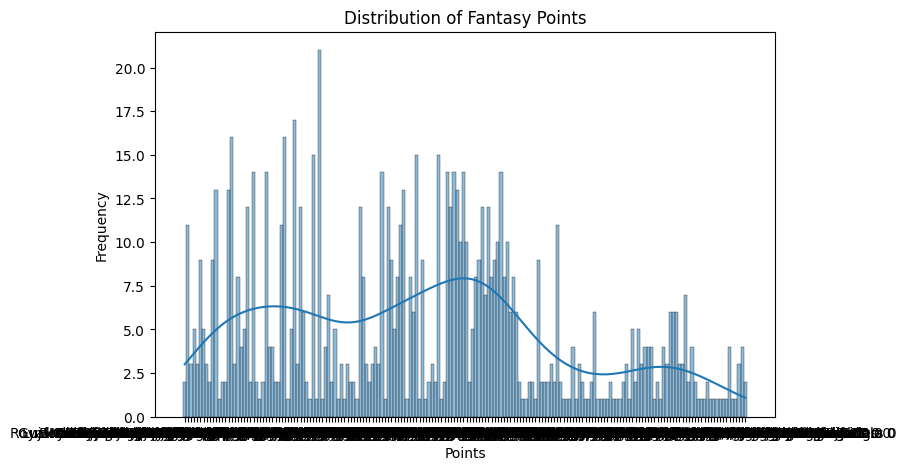

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['points'], kde=True, bins=30)
plt.title('Distribution of Fantasy Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

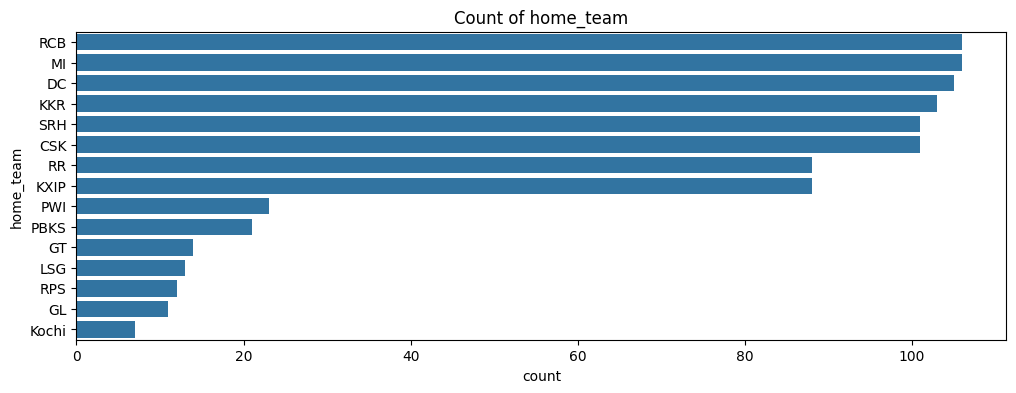

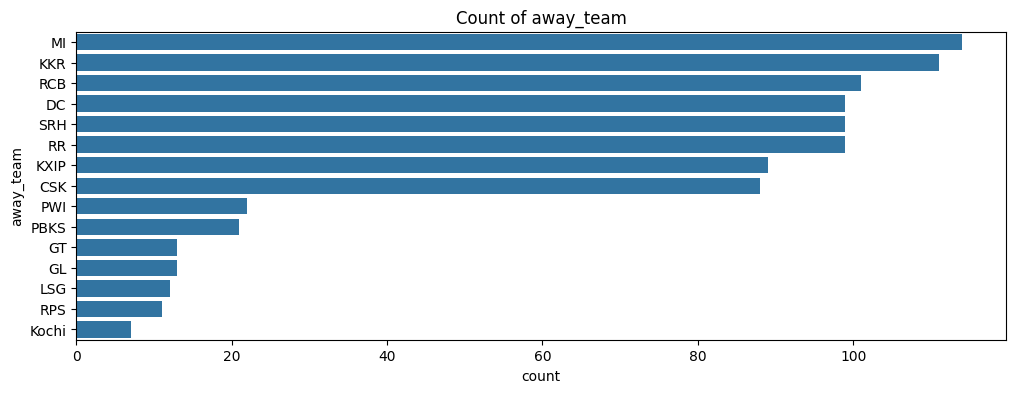

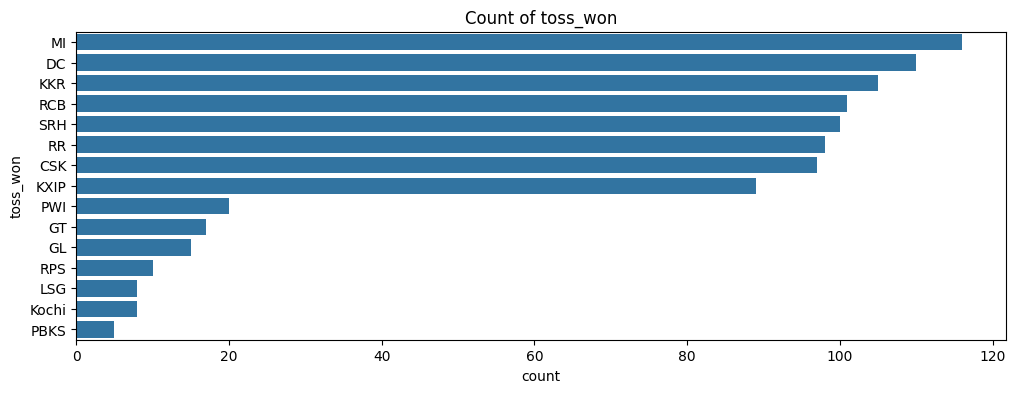

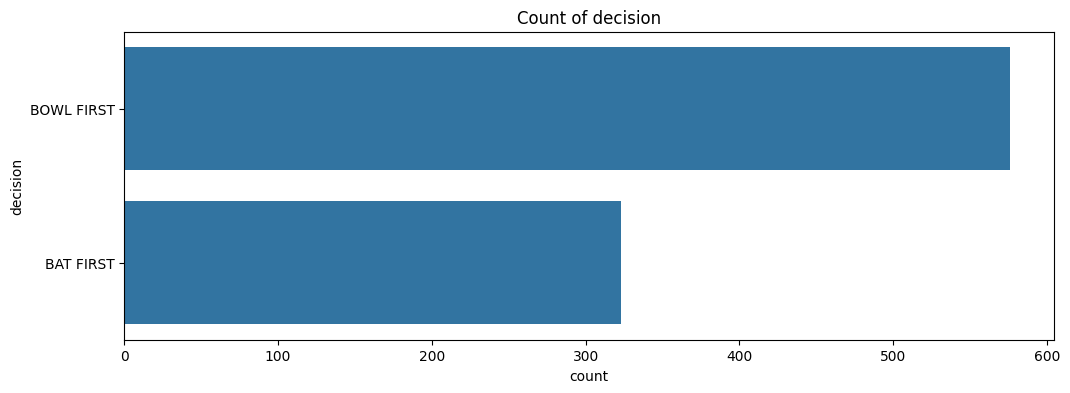

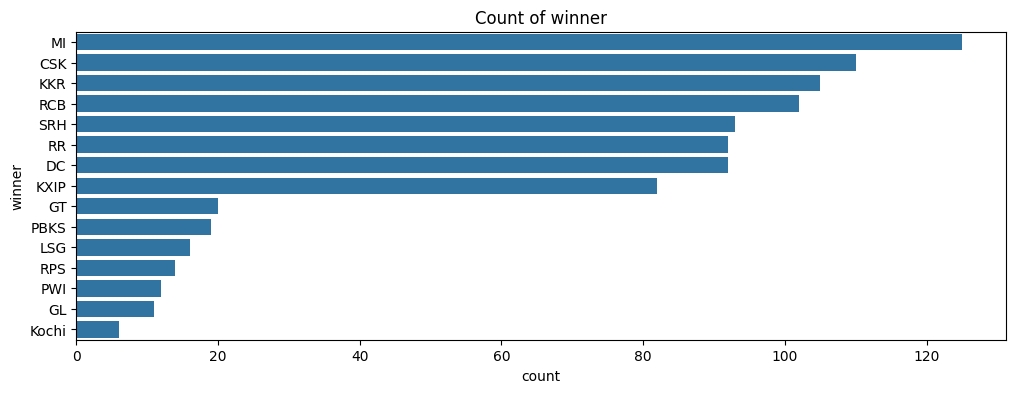

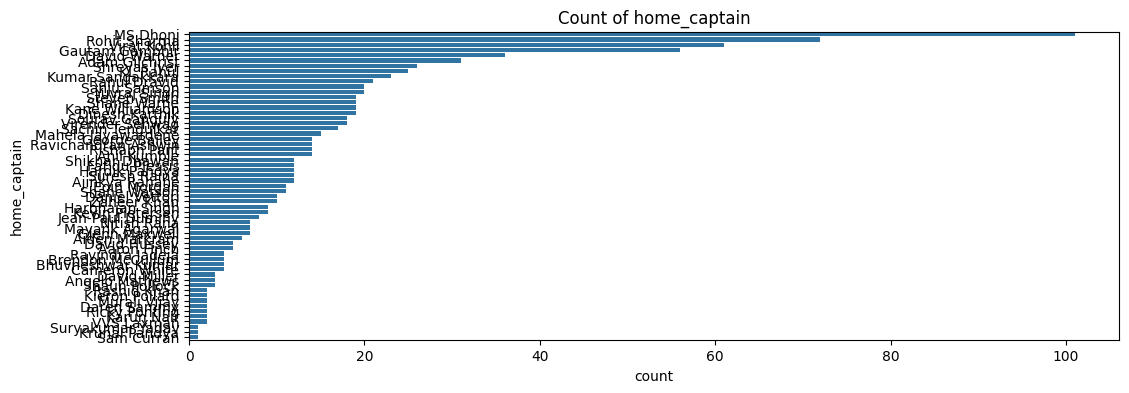

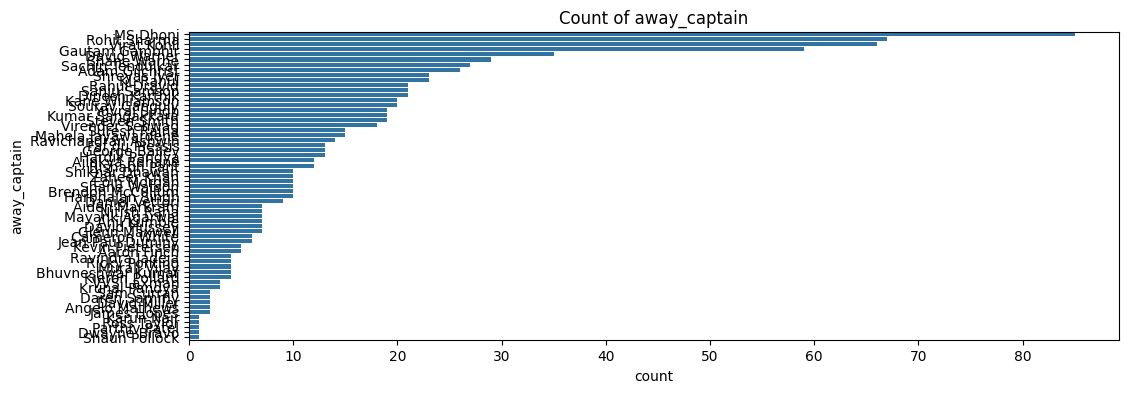

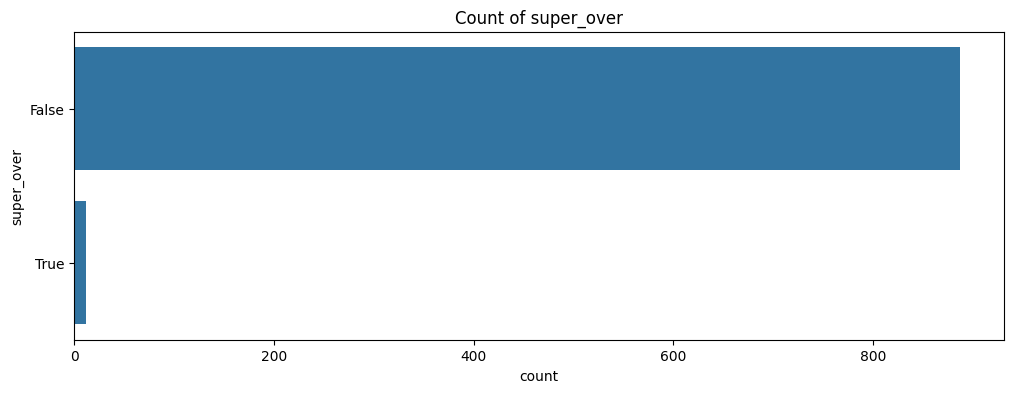

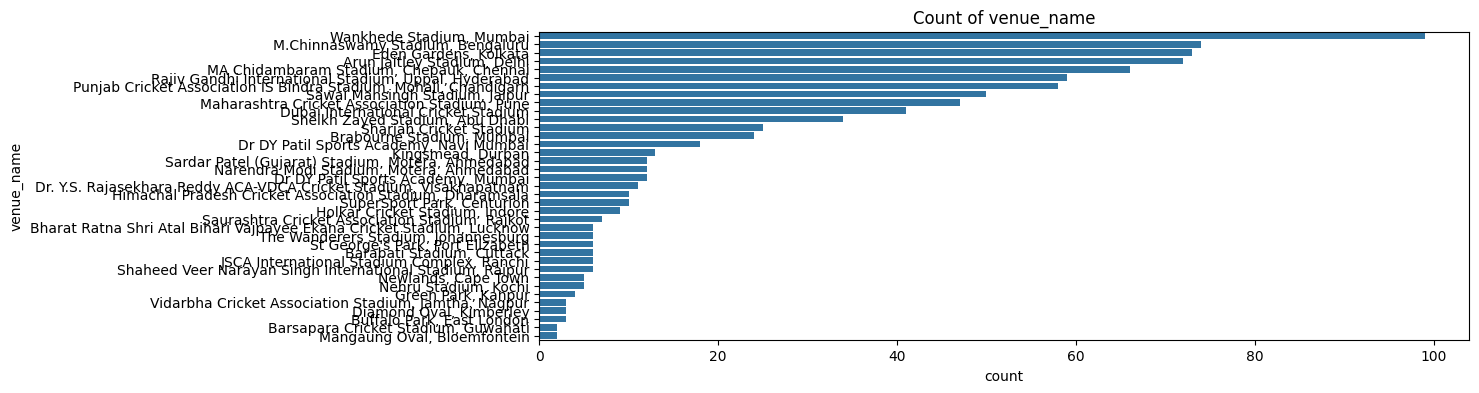

In [23]:
categorical_cols = ['home_team', 'away_team', 'toss_won', 'decision', 'winner', 
                    'home_captain', 'away_captain', 'super_over', 'venue_name']

for col in categorical_cols:
    plt.figure(figsize=(12,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()